In [9]:
# importing the module 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.datasets import mnist 

In [10]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

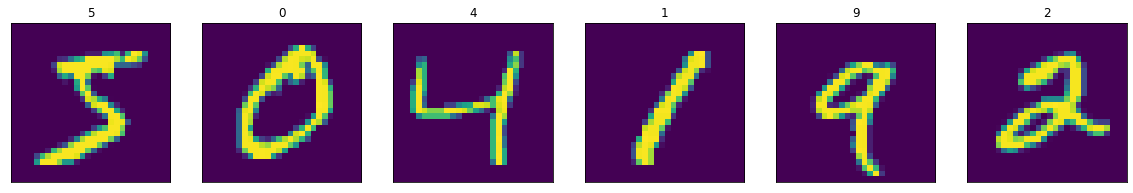

In [11]:
# visualization
fig = plt.figure(figsize=(20,20))

for i in range(6):
    ax = fig.add_subplot(1,6,i+1, xticks= [], yticks=[])
    ax.imshow(X_train[i])
    ax.set_title(str(y_train[i]))

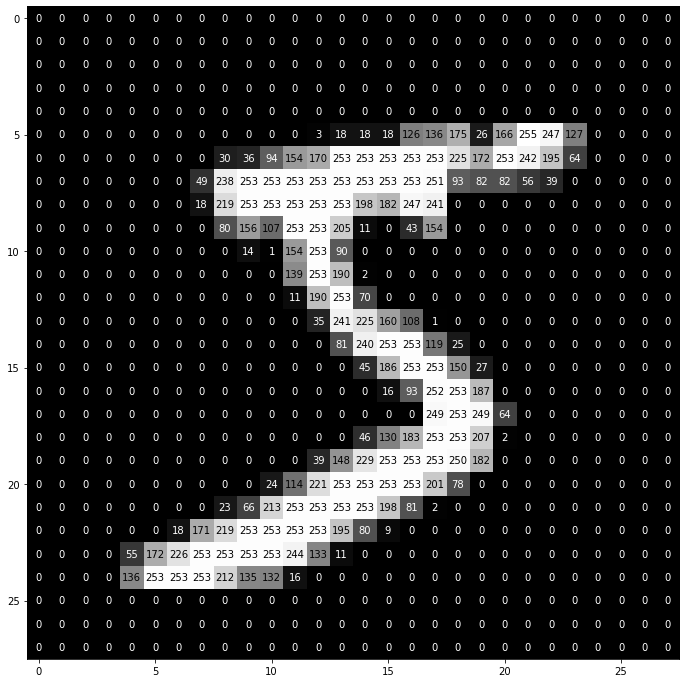

In [12]:
## viewing an image in more detail 

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [13]:
# Rescale the images by dividing every pixel image by 255 

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [14]:
# 5. categorical encode integer labels using one-hot scheme 
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [15]:
print(y_train[:1])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [43]:
# defining the model Architechture 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


# defining the model 
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [44]:
# 7. compiling the model 
model.compile(loss= 'categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])


In [45]:
# 8. Calculate the classification Accuracy in the Test Set 
score = model.evaluate(X_test, y_test,verbose=0)
accuracy = 100*score[1]


In [46]:
print(accuracy)

11.089999973773956


In [47]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/10
375/375 [==============================] - 16s 37ms/step - loss: 0.2777 - accuracy: 0.9134 - val_loss: 0.1272 - val_accuracy: 0.9625

Epoch 00001: val_loss improved from inf to 0.12723, saving model to mnist.model.best.hdf5
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.1093 - accuracy: 0.9664 - val_loss: 0.0972 - val_accuracy: 0.9718

Epoch 00002: val_loss improved from 0.12723 to 0.09725, saving model to mnist.model.best.hdf5
Epoch 3/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0766 - accuracy: 0.9761 - val_loss: 0.0901 - val_accuracy: 0.9749

Epoch 00003: val_loss improved from 0.09725 to 0.09006, saving model to mnist.model.best.hdf5
Epoch 4/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0855 - val_accuracy: 0.9774

Epoch 00004: val_loss improved from 0.09006 to 0.08548, saving model to mnist.model.best.hdf5
Epoch 5/10
375/375 [============================

In [31]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [32]:

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.5500%


In [40]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'sklearn'

In [41]:
# Instatnsing the model
model = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
max_depth = [1,3,4, None]
splitter = ['best', 'random']

NameError: name 'DecisionTreeClassifier' is not defined

In [42]:
# gridsearch 
grid = GridSearchCV(estimator= model, cv = 3, param_grid= dict(criterion= criterion, max_depth  = max_depth, splitter= splitter))
# fitting the Grid-search
grid.fit(X,y)
# Methods to run on the Grid search 
print(grid.best_score_)
print

NameError: name 'GridSearchCV' is not defined